**Other01 direct 7days-shift cleaning data to watch(not necessary,only for watching and compare)(PS:Download on the server offer by the match organization is prohibit,so the effect of code is only can be showed by screenshot of running on server.)**

**The prediction result is 0.3182（mape).(screenshot shown in the end of code)**

**对清洗数据直接平移7天观察效果（不重要，只是为了观察和比较）（备注：因赛事方比赛服务器限制所有下载，部分代码效果只有对服务器代码运行截图显示，参见代码部分。）**

**预测结果0.3182（mape)。(参见代码最后截图)**

In [ ]:
import os
import pickle
import datetime
import zipfile

In [ ]:
start_time = datetime.datetime.now()
log_str = 'start_time is {}'.format(start_time)
print(log_str)

In [ ]:
def df_to_csv(input_data,net_kind = "4g",city_name = False,
             data_columns = ['上行利用率PUSCH','下行利用率PDSCH', '有效RRC连接平均数', '下行流量', '上行流量', '下行利用率PDCCH'],
             data_col_dict = {'上行利用率PUSCH':'PUSCH','下行利用率PDSCH':'PDSCH','有效RRC连接平均数':'RRC',
                             '下行流量':'PDCPDL','上行流量':'PDCPUL','下行利用率PDCCH':'PDCCH','有数据传输的RRC数':'RRC'}):
    input_data.reset_index(drop = True,inplace = True)
    input_data["TimeStamp_orgin"] =  input_data["TimeStamp"].apply(lambda x: datetime.datetime.strptime(x,"%Y-%m-%d %H:%M:%S"))
    #取6月的最后7天进行平移观察清洗效果
    input_data = input_data.loc[input_data["TimeStamp_orgin"] > '2021-06-23T23:00:00.000000000']
    input_data[data_columns] = input_data[data_columns].astype('float64')
    columns_name = ["UserLabel"]
    for order_num in range(1,169):
        columns_name.append("预测未来{}小时".format(order_num))
    if city_name == False:
        city_name = input_data['city'].iloc[0]
    for data_col in data_columns:
        data_col_in = data_col_dict[data_col]
        output_data = input_data.pivot_table(data_col,index = "UserLabel",columns = "TimeStamp")
        output_data.reset_index(inplace = True)
        output_data.columns = columns_name
        output_data.set_index("UserLabel",inplace = True)
        output_data = output_data.fillna(output_data.mean())
        csv_name = './result_data_7shift/{}_{}_{}.csv'.format(net_kind,data_col_in,city_name)
        print("begin output_data in {}".format(csv_name))
        output_data.to_csv(csv_name,encoding= 'gbk')
        print("success output_data in {}".format(csv_name))

In [ ]:
G5_data_columns = ['上行利用率PUSCH','下行利用率PDSCH', '有数据传输的RRC数', '下行流量', '上行流量', '下行利用率PDCCH']
fileFolder = './Datasets_new_IQR_100'
for folderName,subfolders,filenames in os.walk(fileFolder):
    for filename in filenames:
        if '4g_pm' in filename and '202106' in filename:
            city_name = filename[-20:-4]
            in_file = os.path.join(folderName,filename)
            file=open(in_file,'rb')
            df = pickle.load(file)
            df_to_csv(df,city_name = city_name)
            file.close()
        elif '5g_pm' in filename and '202106' in filename:
            city_name = filename[-20:-4]
            in_file = os.path.join(folderName,filename)
            file=open(in_file,'rb')
            df = pickle.load(file)
            df_to_csv(df,net_kind = "5g",data_columns = G5_data_columns,city_name = city_name)
            file.close()

In [ ]:
end_time = datetime.datetime.now()
log_str = 'end_time is {}'.format(end_time)
print(log_str)
all_use_time = (end_time - start_time)
log_str = 'all_use_time is {}'.format(all_use_time)
print(log_str)

In [ ]:
def compressFolder(folderPath, compressPathName):
    '''
    :param folderPath: 文件夹路径
    :param compressPathName: 压缩包路径
    :return:
    '''
    zip = zipfile.ZipFile(compressPathName, 'w', zipfile.ZIP_DEFLATED)
    for path, dirNames, fileNames in os.walk(folderPath):
        for name in fileNames:
            fullName = os.path.join(path, name)
            name = "result_data" + '/' + name
            print(fullName)
            print(name)
            zip.write(fullName, name)

    zip.close()

In [ ]:
folderPath = './result_data_7shift'
compressPathName = './result_data.zip'
compressFolder(folderPath, compressPathName)

In [ ]:
!curl --location --request POST 'http://36.133.53.121:1080/file/upload' --form 'cloud_id=CIDC-U-6fca7a4e9f9645f0abe69ea1df9f7e26' --form 'file=@result_data.zip'

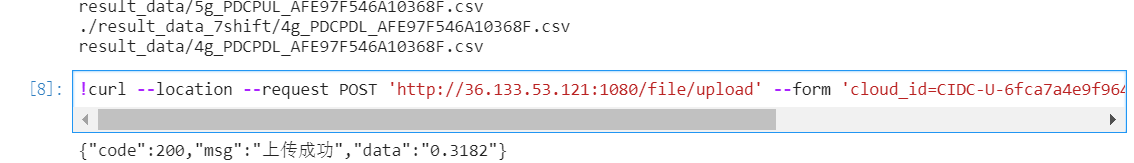